In [87]:
import numpy as np
import math

In [89]:
def mouse_callback(event, x, y, flags, param):
    if (event == cv.EVENT_LBUTTONUP) :
        print("x :", x, "y :", y)
        x_points.append(x)
        y_points.append(y)

In [90]:


cv.namedWindow('image')
cv.setMouseCallback('image', mouse_callback)

while(True):
        cv.imshow('image',img)
        k = cv.waitKey(1) & 0xFF    
        if k == 27:
            break
cv.destroyAllWindows()

x : 1998 y : 529
x : 530 y : 511
x : 842 y : 639
x : 884 y : 644
x : 846 y : 484
x : 881 y : 501
x : 686 y : 446


In [145]:
x_points = [0,0,0,0,0,0]
y_points = [0,0,0,0,0,0]
x_points[0] = 524
y_points[0] = 512
x_points[1] = 1998
y_points[1] = 529
x_points[2] = 884
y_points[2] = 640
x_points[3] = 842
y_points[3] = 639
x_points[4] = 881
y_points[4] = 501
x_points[5] = 846
y_points[5] = 485

In [146]:
x_points

[524, 1998, 884, 842, 881, 846]

In [147]:
y_points

[512, 529, 640, 639, 501, 485]

In [148]:
def draw_line(vector, color):
    a = vector[0]
    b = vector[1]
    c = vector[2]
    m = - (a/b)
    i = - (c/b)
    x = np.linspace(-2000,2500,100)
    y = m*x+i
    plt.plot(x, y, c=color)

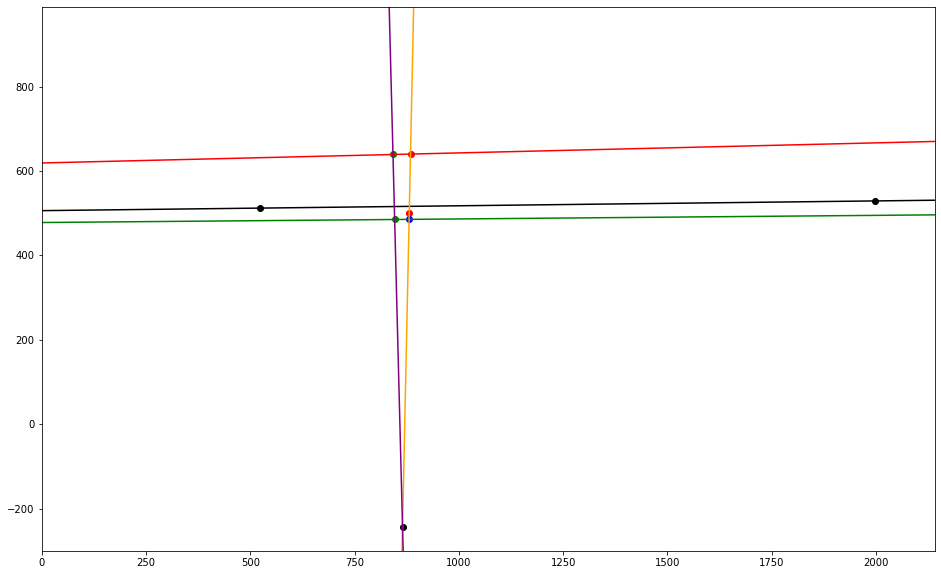

In [149]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.xlim(0,img.shape[1])
plt.ylim(-300,img.shape[0])

plt.scatter(x_points[0], y_points[0], c='black')
plt.scatter(x_points[1], y_points[1], c='black')
plt.scatter(x_points[2], y_points[2], c='red')
plt.scatter(x_points[3], y_points[3], c='green')
plt.scatter(x_points[4], y_points[4], c='red')
plt.scatter(x_points[5], y_points[5], c='green')

vanishing_point1 = np.array([x_points[0], y_points[0], 1]).T
vanishing_point2 = np.array([x_points[1], y_points[1], 1]).T
l = np.cross(vanishing_point1, vanishing_point2)
draw_line(l, 'black')


b = np.array([x_points[2], y_points[2], 1]).T
br = np.array([x_points[3], y_points[3], 1]).T
b_br = np.cross(b, br)
draw_line(b_br, 'r')

q = np.cross(l, b_br)
q = q/q[2]
plt.scatter(q[0], q[1], c='orange')


tr = np.array([x_points[5], y_points[5], 1]).T
tr_q = np.cross(tr, q/q[2])
draw_line(tr_q, 'g')

t = np.array([x_points[4], y_points[4], 1]).T
tb = np.cross(t, b)
draw_line(tb, 'orange')

tr_br = np.cross(tr, br)
draw_line(tr_br, 'purple')

p = np.cross(tb, tr_br)
p = p/p[2]
plt.scatter(p[0], p[1], c='black')

pb = np.cross(p/p[2], b)
#draw_line(pb, 'red')

i = np.cross(pb, tr_q)
i = i/i[2]
plt.scatter(i[0], i[1], c='blue')

plt.show()

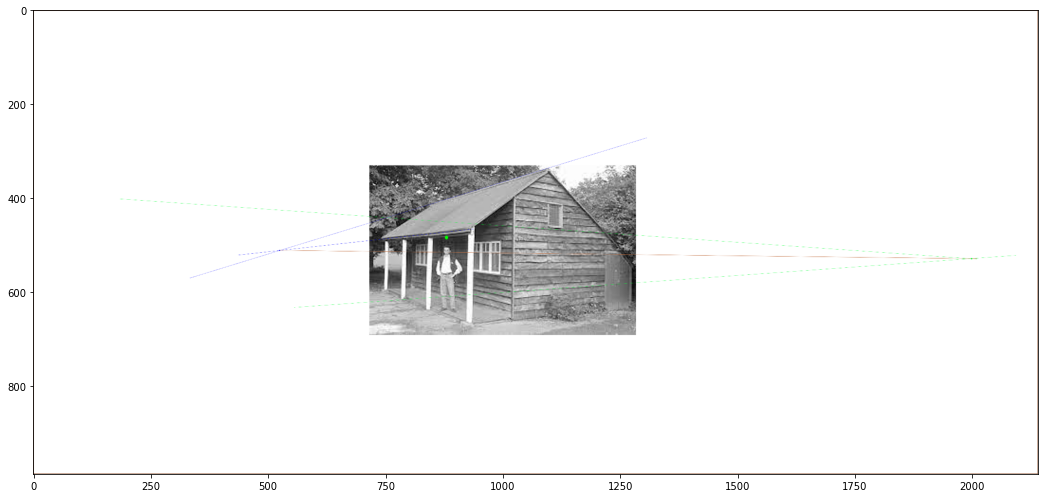

In [150]:
img = cv.line(img, (int(i[0]), int(i[1])), (int(i[0]), int(i[1])), (0,255,0), 5) #vanish point1
#cv.imshow('image',img)
#cv.waitKey(0)
#cv.destroyAllWindows()
plt.figure(figsize=(18,10))
plt.imshow(img)

In [151]:
def distance(a, b):
    result = math.sqrt( math.pow(a[0] - b[0], 2) + math.pow(a[1] - b[1], 2))# + math.pow(a[2] - b[2], 2))
    return result

hr = 201
H = np.array([[hr * (distance(p, b) - distance(i, b)), 0],
              [-distance(i, b), distance(p, b) * distance(i, b)]])

s = np.dot(H, np.array([distance(t, b), 1]))


In [152]:
H

array([[146562.15990954,      0.        ],
       [  -154.74219702, 136777.73771047]])

In [153]:
s/s[1]

array([176.78513413,   1.        ])